# Mushroom Classification

### Goal
The goal of this project is to be able to classifiy mushrooms into either safe to eat or poisionous based on certain physical features. The dataset was originally contributed to the UCI Machine Learning Library.    
In doing so, I attempt to answer the following questions:
- What model works best to classify this data?
- What features are imporatant when trying to discern between a mushroom thats poisionous and safe to eat?

### Description
This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy.

Dataset and information about the dataset can be found here: https://www.kaggle.com/uciml/mushroom-classification

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

In [2]:
data = pd.read_csv('../input/mushroom-classification/mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Data Exploration

In [3]:
#Data about information in each column in dataset
for col in data.columns:
    print(col, ':', data[col].unique())

class : ['p' 'e']
cap-shape : ['x' 'b' 's' 'f' 'k' 'c']
cap-surface : ['s' 'y' 'f' 'g']
cap-color : ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises : ['t' 'f']
odor : ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment : ['f' 'a']
gill-spacing : ['c' 'w']
gill-size : ['n' 'b']
gill-color : ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape : ['e' 't']
stalk-root : ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring : ['s' 'f' 'k' 'y']
stalk-surface-below-ring : ['s' 'f' 'y' 'k']
stalk-color-above-ring : ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring : ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type : ['p']
veil-color : ['w' 'n' 'o' 'y']
ring-number : ['o' 't' 'n']
ring-type : ['p' 'e' 'l' 'f' 'n']
spore-print-color : ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population : ['s' 'n' 'a' 'v' 'y' 'c']
habitat : ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [4]:
#Finding missing values
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

-------------------------------------------------------------------------------------------------------------------------

Every column in the dataset consists of catagorical variables. 

There are no columns with numerical data. Additionally, there are no missing values in the dataset at all. 

This makes the preprocessing stage a breeze. 

However, do note that the column 'veil-type' contains only a single variable. This makes the column useless to the dataset because it adds no insight into the data. Therefore, we shall drop this column.

All we need to do is to biforcate the columns into two lists. The first will contain all the columns that need to be label encoded, while the second will contain those that need to be onehot encoded.

Before that, however, I label encode the entire dataset in order to better visualise the trends in the data.

-------------------------------------------------------------------------------------------------------------------------

In [5]:
#Creating labeled dataframe in order to visualize trends in the data
try:
    data.drop(columns = 'veil-type', inplace = true)
    print('veil-type dropped')
except:
    pass

lenc = LabelEncoder()
labeled_data = pd.DataFrame()
for col in data.columns:
    labeled_data[col] = lenc.fit_transform(data[col]).astype('int64')
    print(col, 'done')

class done
cap-shape done
cap-surface done
cap-color done
bruises done
odor done
gill-attachment done
gill-spacing done
gill-size done
gill-color done
stalk-shape done
stalk-root done
stalk-surface-above-ring done
stalk-surface-below-ring done
stalk-color-above-ring done
stalk-color-below-ring done
veil-type done
veil-color done
ring-number done
ring-type done
spore-print-color done
population done
habitat done


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


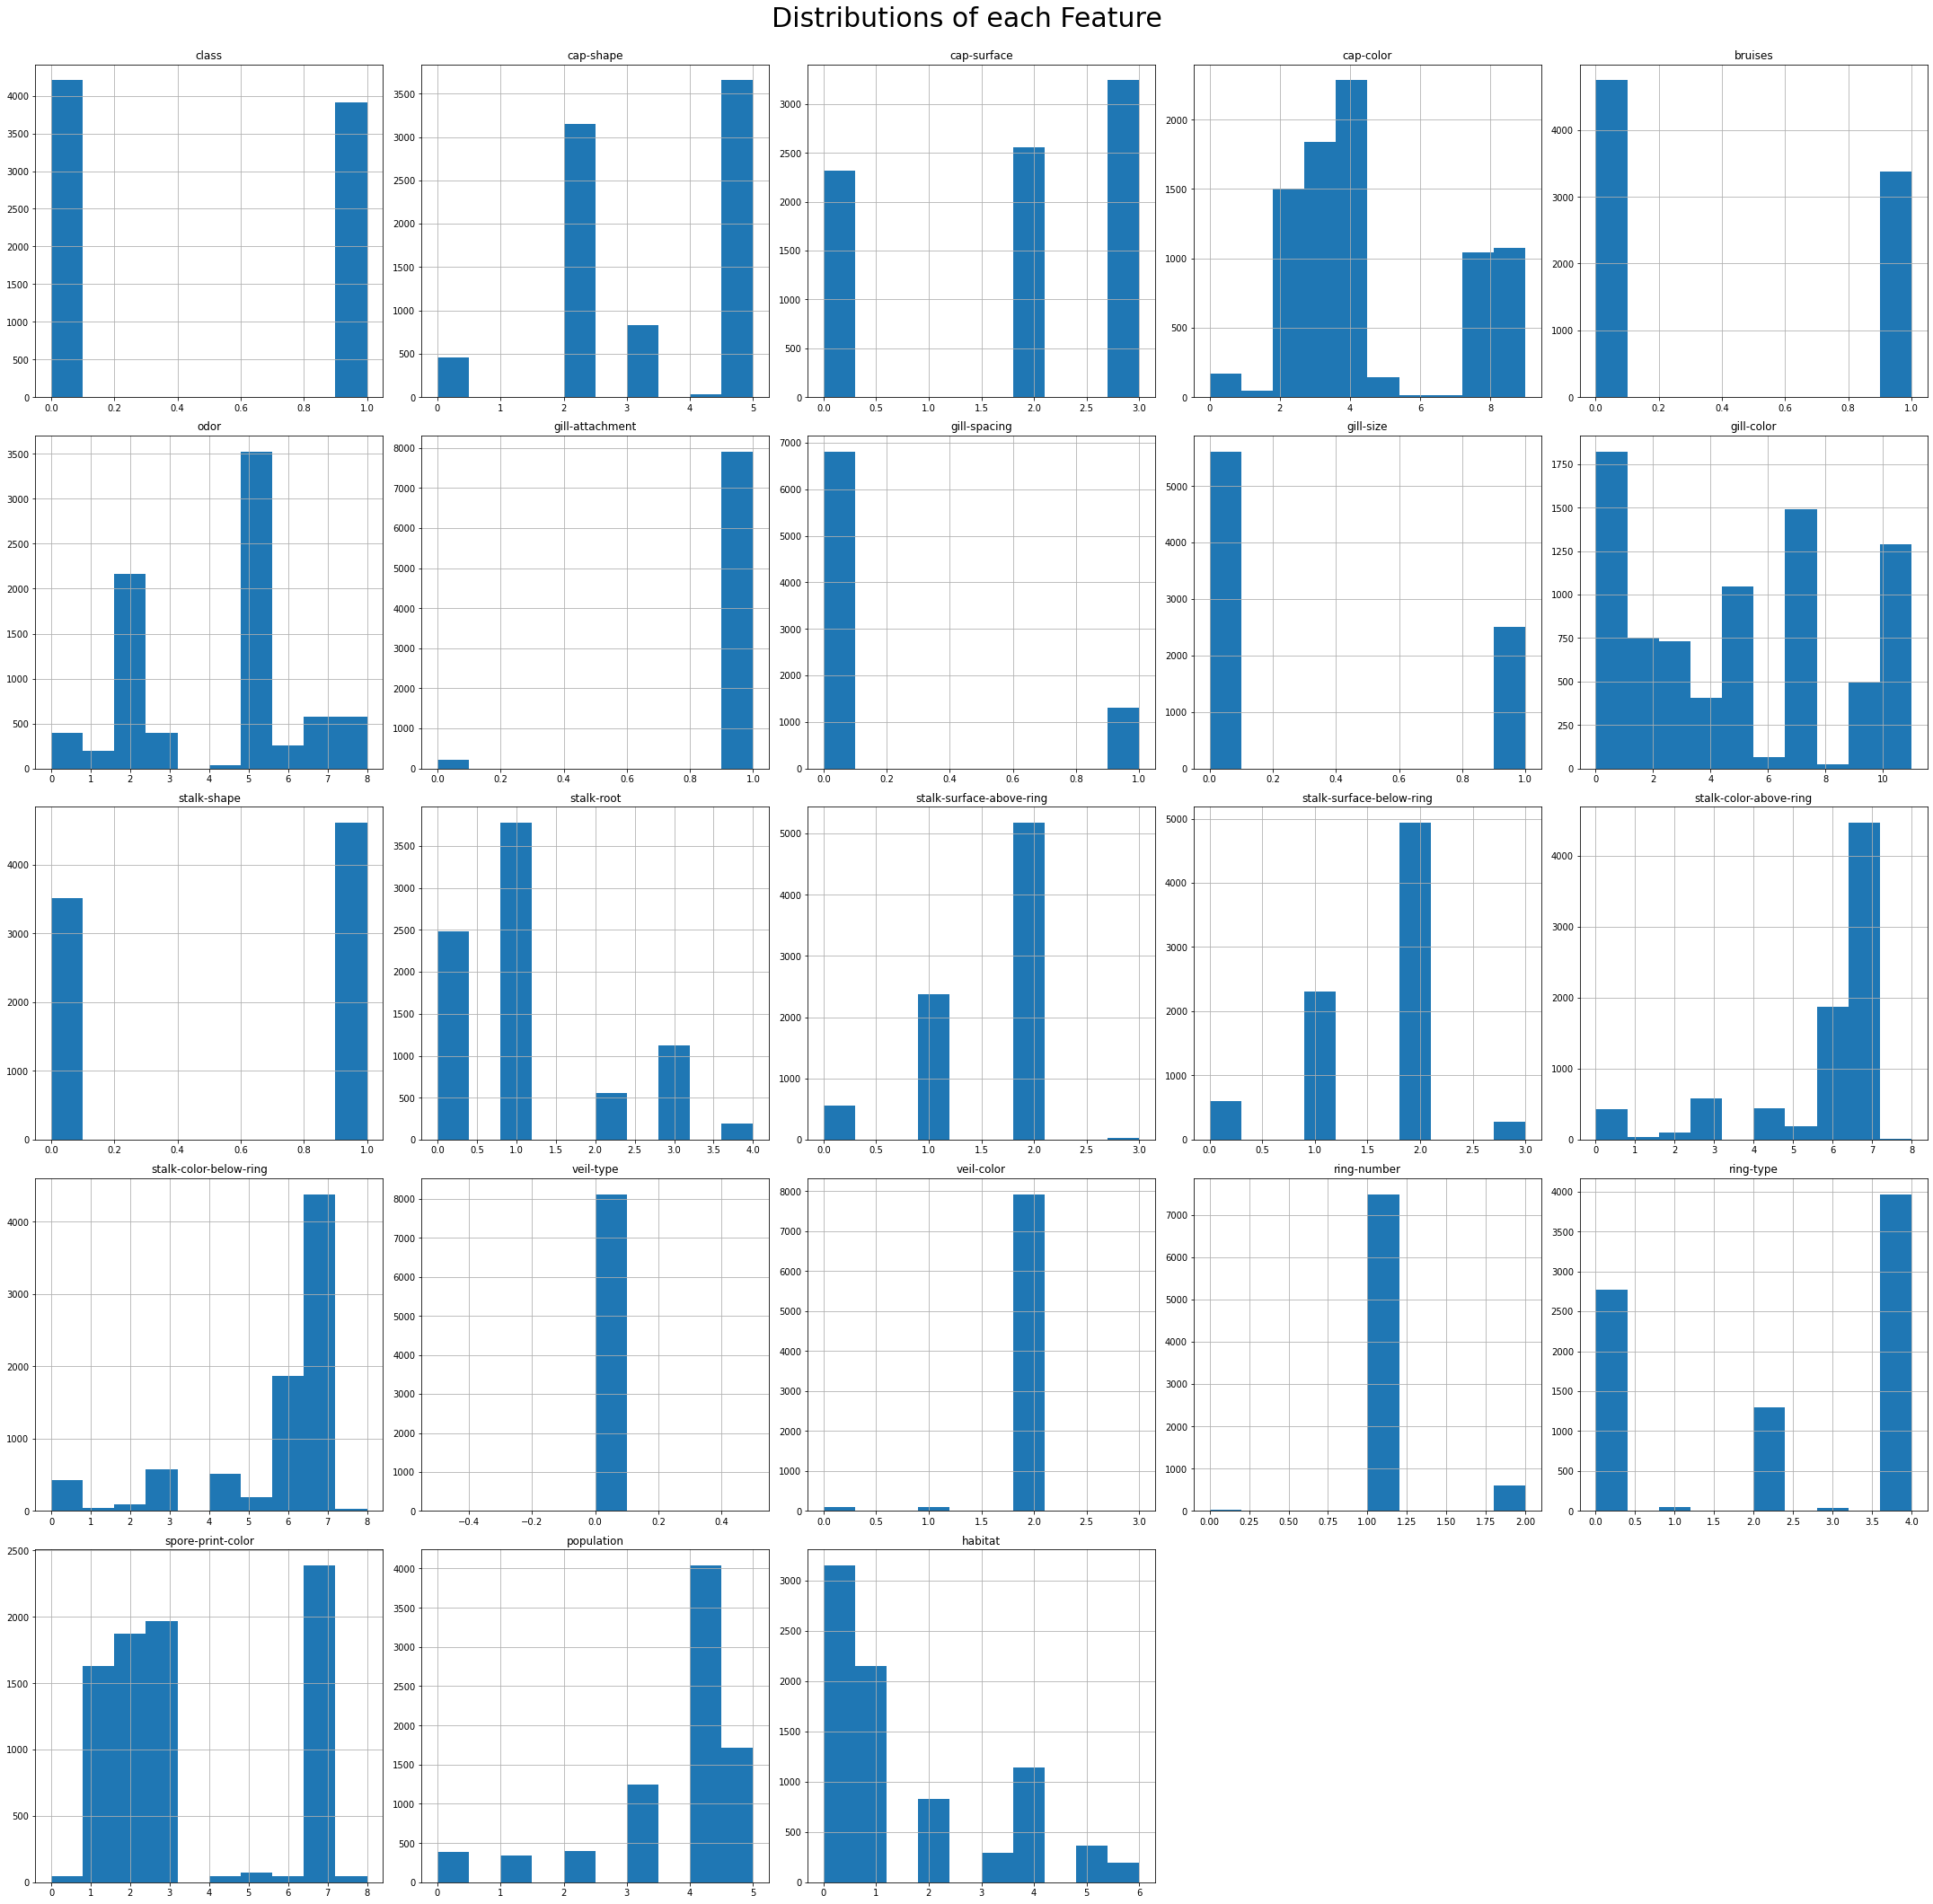

In [6]:
#Distribution of data in the dataframe in the form of histograms.
fig = plt.figure(figsize = (30,30))
ax = fig.gca()
labeled_data.hist(ax=ax)
fig.suptitle('Distributions of each Feature', size = 30)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

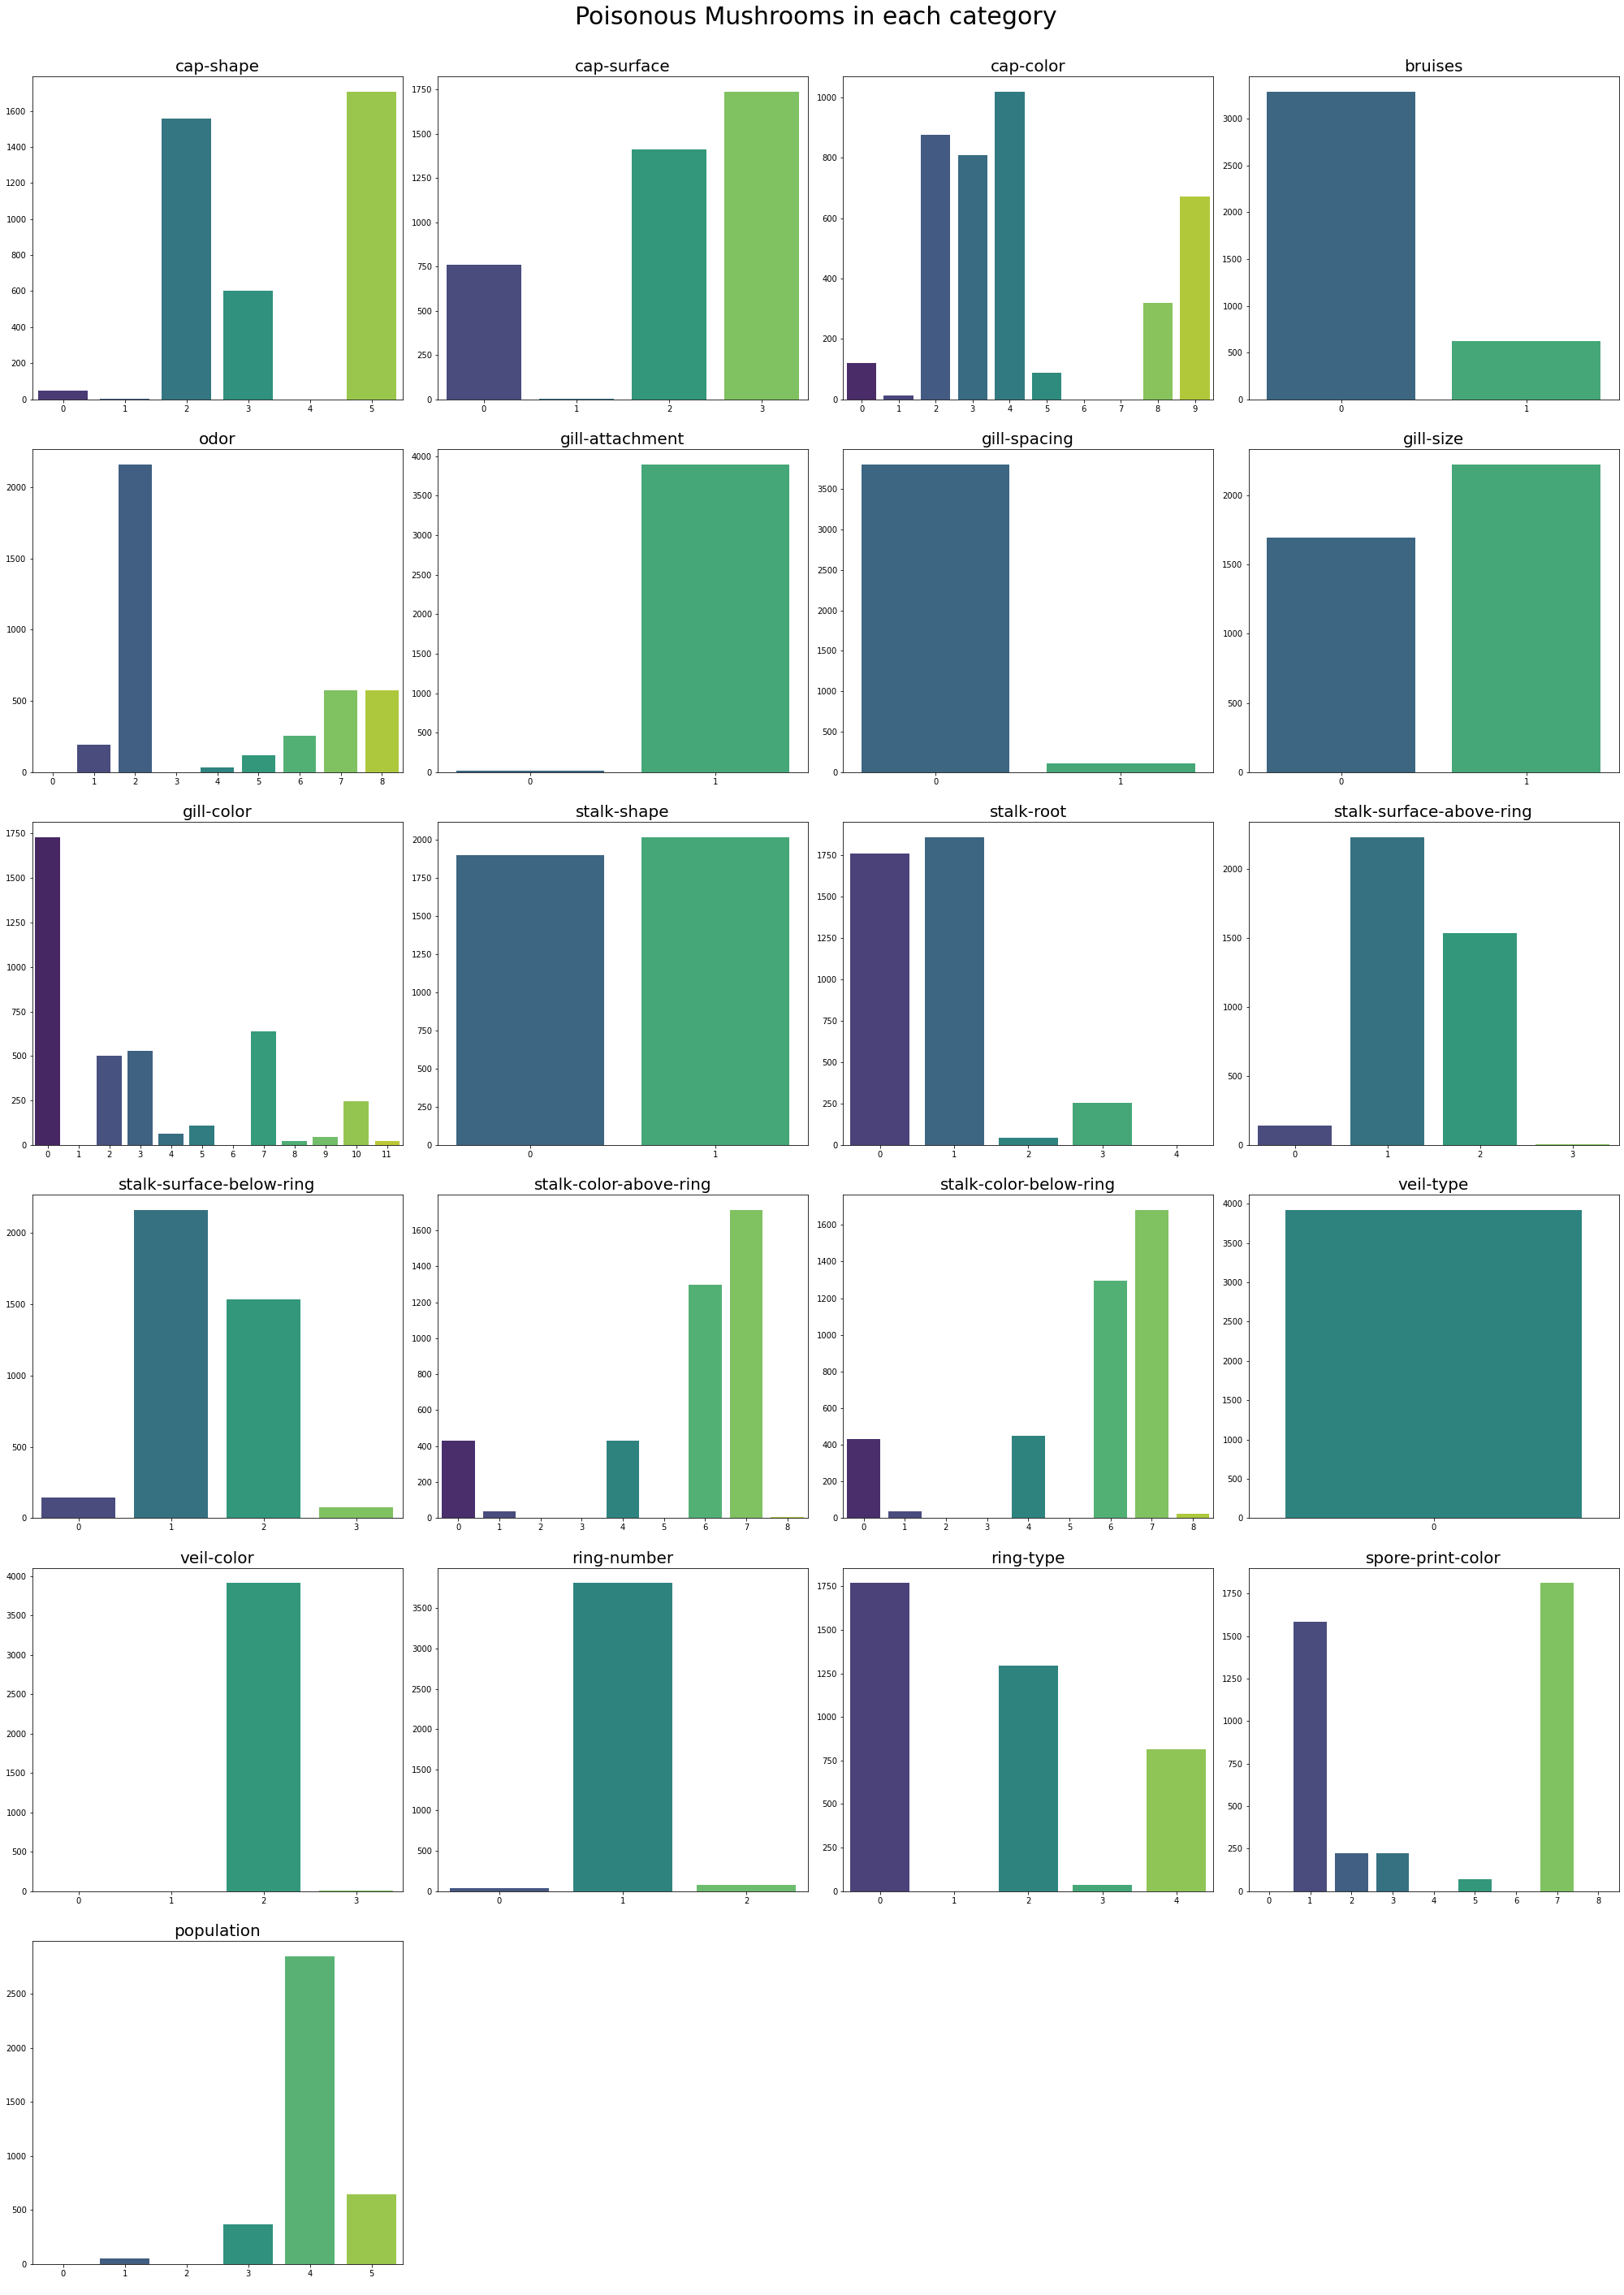

In [7]:
#Plotting features vs class data to uncover any strong trends between features and target class
fig, ax = plt.subplots(6,4, figsize = (28,40))
columns = list(labeled_data.columns)
n = 1
for i in range(6):
    for j in range(4):
        sns.barplot(x = labeled_data[['class',columns[n]]].groupby(columns[n])['class'].sum().keys(),
                    y = labeled_data[['class',columns[n]]].groupby(columns[n])['class'].sum().values,
                   palette = 'viridis',
                   ax = ax[i,j]
                   ).set_title(columns[n], size = 20)
        ax[i,j].set_xlabel(" ")
        n += 1
        if n == len(columns):
            break
fig.suptitle('Poisonous Mushrooms in each category', size = 30)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
ax[5,1].set_visible(False)
ax[5,2].set_visible(False)
ax[5,3].set_visible(False)
plt.show()

-------------------------------------------------------------------------------------------------------------------
The barcharts above display the number of poisonous mushrooms for each category in each feature. 

We notice that some of the data like 'ring-number' and 'gill-attachment' is heavily skewed. This is because they are highly correlated with our taget class, which would allow us to make good predictions based on those classes alone. This means that for a feature like 'ring-number', if the 'ring-number' is 1, then there is a high probability that the mushroom in consideration is poisonous. 


-------------------------------------------------------------------------------------------------------------------

## Data Preprocessing

In [8]:
#Creating lists of colums to be label encoded and onehot encoded. 
## Columns to be label encoded have only 2 categories while those that need to be onehot encoded have more than 2 categories. 
label_encoding_columns = [col for col in data.columns if data[col].nunique() == 2]
onehot_encoding_columns = [col for col in data.columns if col not in label_encoding_columns]

In [9]:
#Label Encoding and Onehot Encoding
label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder(handle_unknown='ignore')

In [10]:
#Creating a Transformer to smoothly transform columns
preprocessor = ColumnTransformer(
    transformers=[
    ('label', label_encoder, label_encoding_columns),
    ('onehot', onehot_encoder, onehot_encoding_columns)
])

In [11]:
#Create a dataframe with labeled data
data_label = pd.DataFrame()
for col in label_encoding_columns:
    data_label[col] = label_encoder.fit_transform(data[col]).astype('int64')
    print(col, 'label encoded')

class label encoded
bruises label encoded
gill-attachment label encoded
gill-spacing label encoded
gill-size label encoded
stalk-shape label encoded


In [12]:
#Create dataframe with onehot encoded (dummy) data
data_dummies = pd.get_dummies(data[onehot_encoding_columns], columns = onehot_encoding_columns, drop_first = False, dtype= 'int64')

In [13]:
#Concatinate both labeled and onehot dataframes to create dataframe with all data which has been iether label encoded or onehot encoded
data_encoded = pd.DataFrame()
data_encoded = pd.concat([data_label ,data_dummies], axis = 1)

In [14]:
data_label.shape, data_dummies.shape, data_encoded.shape

((8124, 6), (8124, 107), (8124, 113))

## Modelling

In [15]:
#Splitting data into features X and target y
X = data_encoded.drop('class', axis = 1)
y = data_encoded['class']

In [16]:
#Splitting data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

### Random Forest Classifier

In [17]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)
score = accuracy_score(y_pred, y_test)

print('The accuracy score for Random Forest Classifier is %.1f'%(score))

The accuracy score for Random Forest Classifier is 1.0


---


In conclusion, we obtained a perfect accuracy score on our testing set. Normally, a perfect score would mean the model has overfit the dataset, however, in this case, because of extremely skewed features and high correlation with our target, our model was able to obtained a perfect accuracy with minimal effort and no hyper parameter tuning. This result atypical and should not be expected to be replicated for other datasets. 

Thank you for reading! Please comment down below if you have any questions!

---